In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline


In [36]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

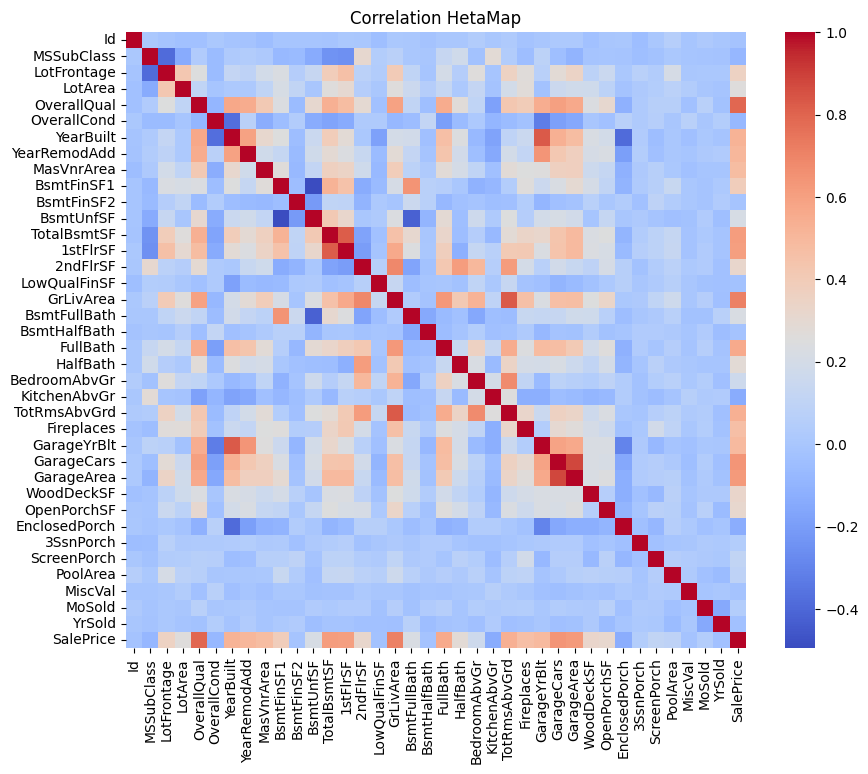

In [37]:
corr_matrix=train.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=False, fmt=".2f", cmap='coolwarm')
plt.title("Correlation HetaMap")
plt.show()

In [38]:
corr_matrix['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [39]:
missing=train.isnull().sum()
missing[missing>0]
missing.sort_values(inplace=True, ascending=False)
missing.head(10)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageFinish      81
GarageType        81
dtype: int64

In [40]:
cols_to_drop=['PoolQC', 'MiscFeature','Alley', 'Fence','MasVnrType', 'FireplaceQu', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF', 'HalfBath','LotArea', 'BsmtFullBath','BsmtUnfSF','BedroomAbvGr', 'ScreenPorch', 'PoolArea', 'MoSold', '3SsnPorch', 'BsmtFinSF2', 'BsmtHalfBath', 'MiscVal', 'Id', 'LowQualFinSF', 'YrSold', 'OverallCond', 'MSSubClass', 'EnclosedPorch', 'KitchenAbvGr', '1stFlrSF', 'GarageArea', 'GarageYrBlt']

In [41]:
train.drop(cols_to_drop, axis=1, inplace=True)
test.drop(cols_to_drop, axis=1, inplace=True)

In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 50 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1460 non-null   object 
 1   LotFrontage    1201 non-null   float64
 2   Street         1460 non-null   object 
 3   LotShape       1460 non-null   object 
 4   LandContour    1460 non-null   object 
 5   Utilities      1460 non-null   object 
 6   LotConfig      1460 non-null   object 
 7   LandSlope      1460 non-null   object 
 8   Neighborhood   1460 non-null   object 
 9   Condition1     1460 non-null   object 
 10  Condition2     1460 non-null   object 
 11  BldgType       1460 non-null   object 
 12  HouseStyle     1460 non-null   object 
 13  OverallQual    1460 non-null   int64  
 14  YearBuilt      1460 non-null   int64  
 15  YearRemodAdd   1460 non-null   int64  
 16  RoofStyle      1460 non-null   object 
 17  RoofMatl       1460 non-null   object 
 18  Exterior

In [43]:
train['YearBuilt']=pd.to_datetime(train['YearBuilt'], format='%Y')
train['YearRemodAdd']=pd.to_datetime(train['YearRemodAdd'], format='%Y')



In [44]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 49 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1455 non-null   object 
 1   LotFrontage    1232 non-null   float64
 2   Street         1459 non-null   object 
 3   LotShape       1459 non-null   object 
 4   LandContour    1459 non-null   object 
 5   Utilities      1457 non-null   object 
 6   LotConfig      1459 non-null   object 
 7   LandSlope      1459 non-null   object 
 8   Neighborhood   1459 non-null   object 
 9   Condition1     1459 non-null   object 
 10  Condition2     1459 non-null   object 
 11  BldgType       1459 non-null   object 
 12  HouseStyle     1459 non-null   object 
 13  OverallQual    1459 non-null   int64  
 14  YearBuilt      1459 non-null   int64  
 15  YearRemodAdd   1459 non-null   int64  
 16  RoofStyle      1459 non-null   object 
 17  RoofMatl       1459 non-null   object 
 18  Exterior

In [45]:
test['Utilities']=test['Utilities'].fillna(test['Utilities'].mode()[0])
test['Exterior1st']=test['Exterior1st'].fillna(test['Exterior1st'].mode()[0])
test['Exterior2nd']=test['Exterior2nd'].fillna(test['Exterior2nd'].mode()[0])
test['BsmtFinSF1']=test['BsmtFinSF1'].fillna(0)
test['TotalBsmtSF']=test['TotalBsmtSF'].fillna(0)
test['KitchenQual']=test['KitchenQual'].fillna(test['KitchenQual'].mode()[0])
test['Functional']=test['Functional'].fillna(test['Functional'].mode()[0])
test['GarageCars']=test['GarageCars'].fillna(0)
test['SaleType']=test['SaleType'].fillna(test['SaleType'].mode()[0])
test['YearBuilt']=pd.to_datetime(test['YearBuilt'], format='%Y')
test['YearRemodAdd']=pd.to_datetime(test['YearRemodAdd'], format='%Y')

In [46]:
categ_cols=train.select_dtypes(include=[object, 'datetime']).columns.tolist()
num_cols=train.select_dtypes(include='number').columns.tolist()
num_cols.remove('SalePrice')

In [47]:
categ_pipeline=Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='None')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
num_pipeline=Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('scaler', StandardScaler())
])
processor=ColumnTransformer([
    ('categ', categ_pipeline, categ_cols),
    ('num', num_pipeline, num_cols)
])

In [48]:
y_train=train['SalePrice']
X_train=train.drop('SalePrice', axis=1)

In [49]:
lr_model=Pipeline([
    ('processing', processor),
    ('model', LinearRegression())
])
lr_scores=cross_val_score(lr_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

In [50]:
rg_model=Pipeline([
    ('processing', processor),
    ('model', Ridge())
])
rg_scores=cross_val_score(rg_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

In [51]:
lasso_model=Pipeline([
    ('processing', processor),
    ('model', Lasso())
])
lasso_scores=cross_val_score(lasso_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

c:\Users\SUYOG\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1546674713.6140747, tolerance: 759214014.2531197
  model = cd_fast.sparse_enet_coordinate_descent(
c:\Users\SUYOG\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35403122884.4765, tolerance: 728773513.025937
  model = cd_fast.sparse_enet_coordinate_descent(
c:\Users\SUYOG\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67198526440.46118, tolerance: 699031751.5199751
  model = cd_fast.sparse_enet_coordinate_descent(

In [52]:
rf_model=Pipeline([
    ('processing', processor),
    ('model', RandomForestRegressor())
])
rf_scores=cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

In [53]:
en_model=Pipeline([
    ('processing', processor),
    ('model', ElasticNet())
])
en_scores=cross_val_score(en_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

In [54]:
gbr_model=Pipeline([
    ('processing', processor),
    ('model', GradientBoostingRegressor())
])
gbr_scores=cross_val_score(gbr_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

In [55]:
svr_model=Pipeline([
    ('processing', processor),
    ('model', SVR())
])
svr_scores=cross_val_score(svr_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

In [56]:
cb_model=Pipeline([
    ('processing', processor),
    ('model', CatBoostRegressor())
])
cb_scores=cross_val_score(cb_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

Learning rate set to 0.04196
0:	learn: 78515.9494944	total: 75.7ms	remaining: 1m 15s
1:	learn: 76439.8597197	total: 81.2ms	remaining: 40.5s
2:	learn: 74659.6291137	total: 84.6ms	remaining: 28.1s
3:	learn: 72835.0102800	total: 86.7ms	remaining: 21.6s
4:	learn: 71053.1889873	total: 90ms	remaining: 17.9s
5:	learn: 69364.3900823	total: 93.1ms	remaining: 15.4s
6:	learn: 67872.3745001	total: 96.4ms	remaining: 13.7s
7:	learn: 66171.5378645	total: 99.4ms	remaining: 12.3s
8:	learn: 64510.9883364	total: 103ms	remaining: 11.3s
9:	learn: 63109.8162042	total: 106ms	remaining: 10.5s
10:	learn: 61514.0770067	total: 108ms	remaining: 9.75s
11:	learn: 60107.9137199	total: 111ms	remaining: 9.12s
12:	learn: 58894.0617236	total: 114ms	remaining: 8.62s
13:	learn: 57636.3170182	total: 116ms	remaining: 8.15s
14:	learn: 56361.7513994	total: 118ms	remaining: 7.73s
15:	learn: 55195.1698242	total: 120ms	remaining: 7.37s
16:	learn: 54062.7265853	total: 122ms	remaining: 7.04s
17:	learn: 52901.8027457	total: 123ms	r

In [57]:
xgbr_model=Pipeline([
    ('processing', processor),
    ('model', XGBRegressor())
])
xgbr_scores=cross_val_score(xgbr_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

In [58]:
print('MSE score for lr_model:', -lr_scores.mean())
print('MSE score for rg_model:', -rg_scores.mean())
print('MSE score for lasso_model:', -lasso_scores.mean())
print('MSE score for rf_model:', -rf_scores.mean())
print('MSE score for en_model:', -en_scores.mean())
print('MSE score for gbr_model:', -gbr_scores.mean())
print('MSE score for xgbr_model:', -xgbr_scores.mean())
print('MSE score for cb_model:', -cb_scores.mean())
print('MSE score for svr_model:', -svr_scores.mean())

MSE score for lr_model: 1429263923.4648933
MSE score for rg_model: 1205253225.0024176
MSE score for lasso_model: 1390243465.6513462
MSE score for rf_model: 947769257.442687
MSE score for en_model: 1279393548.950381
MSE score for gbr_model: 852958878.3232739
MSE score for xgbr_model: 972698105.6
MSE score for cb_model: 787903099.593211
MSE score for svr_model: 6617332890.150873


In [59]:
cb_model.fit(X_train, y_train)

Learning rate set to 0.043466
0:	learn: 77053.4911002	total: 3.31ms	remaining: 3.31s
1:	learn: 75078.4573448	total: 5.84ms	remaining: 2.92s
2:	learn: 73049.8273818	total: 7.86ms	remaining: 2.61s
3:	learn: 71148.9885010	total: 10.5ms	remaining: 2.62s
4:	learn: 69314.3870081	total: 13.3ms	remaining: 2.64s
5:	learn: 67460.6471640	total: 15.6ms	remaining: 2.59s
6:	learn: 65827.3370233	total: 17.7ms	remaining: 2.51s
7:	learn: 64188.6425028	total: 20.9ms	remaining: 2.59s
8:	learn: 62493.4167235	total: 22.6ms	remaining: 2.49s
9:	learn: 60929.5776056	total: 24.5ms	remaining: 2.42s
10:	learn: 59470.9392786	total: 26.2ms	remaining: 2.35s
11:	learn: 58059.8736630	total: 27.8ms	remaining: 2.29s
12:	learn: 56658.6350762	total: 29.4ms	remaining: 2.23s
13:	learn: 55558.6511943	total: 31.2ms	remaining: 2.19s
14:	learn: 54244.0236445	total: 32.9ms	remaining: 2.16s
15:	learn: 53163.5351038	total: 34.5ms	remaining: 2.12s
16:	learn: 51906.8413345	total: 36.1ms	remaining: 2.09s
17:	learn: 50789.1067076	tot

Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('categ',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='None',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['MSZoning', 'Street',
                                                   'LotShape', 'LandContour',
                                                   'Utilities', 'LotConfig',
                                                   'LandSlope', 'Neighborhood',
                                                   'Condition1', 'Condition2',
                                                   'BldgType', 'HouseStyle'...
                                                   'HeatingQC', 'CentralAir',
                                                   'Electrical', ...]),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['LotFrontage', 'OverallQual',
                                                   'MasVnrArea', 'BsmtFinSF1',
                                                   'TotalBsmtSF', 'GrLivArea',
                                                   'FullBath', 'TotRmsAbvGrd',
                                                   'Fireplaces',
                                                   'GarageCars'])])),
                ('model',
                 <catboost.core.CatBoostRegressor object at 0x000002CCE19A3A10>)])

In [60]:
y_pred=cb_model.predict(test)
y_pred=np.round(y_pred, 1)
predictions=pd.DataFrame({'Id':range(1461, 1461+len(y_pred)), 'SalePrice':y_pred})
predictions.to_csv('submission-4.csv', index=False)